In [28]:
!pip install -q kaggle 

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [29]:
!mkdir ~/.kaggle 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [30]:
!touch ~/.kaggle/kaggle.json

In [31]:
api_token = {"username":"","key":""}

In [32]:
import json 

with open('/root/.kaggle/kaggle.json','w') as file:
    json.dump(api_token,file)

In [33]:
!chmod 600 ~/.kaggle/kaggle.json

In [34]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --force

100%|██████████████████████████████████████▉| 2.29G/2.29G [00:27<00:00, 121MB/s]
100%|██████████████████████████████████████| 2.29G/2.29G [00:30<00:00, 80.8MB/s]


In [35]:
import zipfile
with zipfile.ZipFile('./chest-xray-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

In [37]:
import glob
import random
import matplotlib.pyplot as plt



def get_random_image(dir,condition):
    placeholder=''
    if condition == 'n':
        placeholder='NORMAL'
    elif condition == 'p':
        placeholder='PNEUMONIA'
    else:
        raise Exception("Sorry, invalid condition")
    folder=f'./data/chest_xray/{dir}/{placeholder}/*.jpeg'
    img_paths=glob.glob(folder)
    max_length=len(img_paths)
    randomNumber=random.randint(0,max_length)
    for index, item in enumerate(img_paths, start=1):
        if index == randomNumber:
            print(index,item)
            image = plt.imread(item)
            readyImage=plt.imshow(image)
            return readyImage



6 ./data/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg


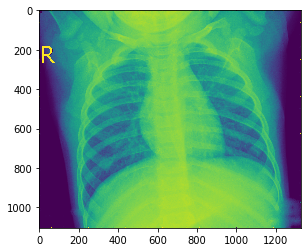

In [39]:
get_random_image("val","n")

In [40]:
from PIL import Image


image = Image.open('')  
print(image.format)
print(image.size)
print(image.mode)

JPEG
(1564, 1302)
L


In [ ]:
import PIL.Image

rgba_image=PIL.Image.open('')
rgb_image=rgba_image.convert('RGB')

In [86]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('')
imgplot = plt.imshow(img)
plt.show()

AttributeError: 'str' object has no attribute 'read'

In [42]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder=f'./data/chest_xray/train/*/*.jpeg'

counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1
        

In [43]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder=f'./data/chest_xray/test/*/*.jpeg'

counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1
        

In [44]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

folder=f'./data/chest_xray/val/*/*.jpeg'

counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1
        

In [45]:
import glob
import pandas as pd

folder=f'./data/chest_xray/*/*.jpeg'

category=[]
filenames=[]
condition_of_lung=[]

all_files=glob.glob(folder)

for filename in all_files:
    if "train" in filename:
        if "pneumonia" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "test" in filename:
        if "pneumonia" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "val" in filename:
        if "pneumonia" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("normal")

all_data_df=pd.DataFrame({"dataset type":category,"x-ray result":condition_of_lung,"filename":filenames})

print(all_data_df.head())
            
        
        
    

  dataset type x-ray result                                       filename
0         test       normal       ./data/chest_xray/test/test_normal4.jpeg
1         test    pneumonia    ./data/chest_xray/test/test_pneumonia1.jpeg
2         test    pneumonia  ./data/chest_xray/test/test_pneumonia359.jpeg
3         test    pneumonia  ./data/chest_xray/test/test_pneumonia197.jpeg
4         test       normal     ./data/chest_xray/test/test_normal103.jpeg


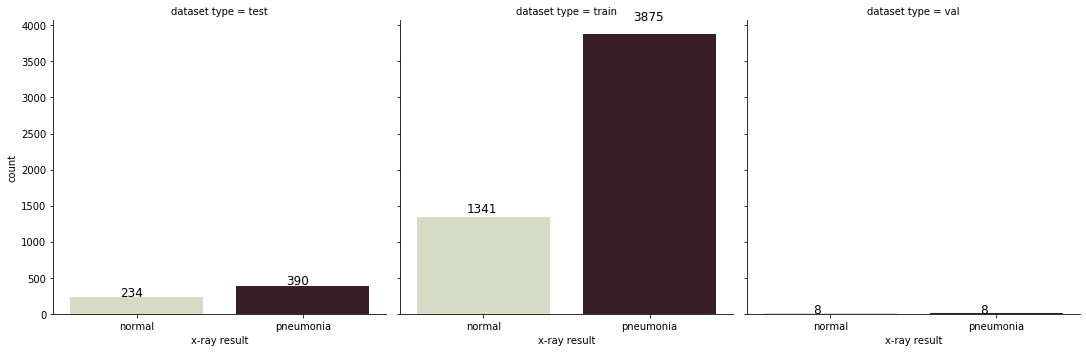

In [46]:
import seaborn as sns

g=sns.catplot(x="x-ray result",col="dataset type",kind="count",palette="ch:.55",data=all_data_df,legend=True)

for i in range(0,3):
    ax=g.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x()+0.3,
        p.get_height()*1.05,
        '{0:.0f}'.format(p.get_height()),
        color='black',
        rotation='horizontal',
        size='large')



In [47]:
import glob
import pandas as pd
import os
train_folder='./data/chest_xray/train/*.jpeg'
train_df_lst=pd.DataFrame(columns=['labels','s3_path'],dtype=object)
train_imgs_path=glob.glob(train_folder)
counter=0
class_arg=''

for i in train_imgs_path:
    if "pneumonia" in i:
        class_arg=1
    else:
        class_arg=0
    train_df_lst.loc[counter]=[class_arg,os.path.basename(i)]
    counter+=1
print(train_df_lst.head())

  labels                   s3_path
0      0     train_normal1203.jpeg
1      1  train_pneumonia3349.jpeg
2      1   train_pneumonia478.jpeg
3      1  train_pneumonia1567.jpeg
4      1  train_pneumonia2296.jpeg


In [48]:
import glob
import pandas as pd
import os
test_folder='./data/chest_xray/test/*.jpeg'
test_df_lst=pd.DataFrame(columns=['labels','s3_path'],dtype=object)
test_imgs_path=glob.glob(test_folder)
counter=0
class_arg=''

for i in test_imgs_path:
    if "pneumonia" in i:
        class_arg=1
    else:
        class_arg=0
    test_df_lst.loc[counter]=[class_arg,os.path.basename(i)]
    counter+=1
print(test_df_lst.head())

  labels                 s3_path
0      0       test_normal4.jpeg
1      1    test_pneumonia1.jpeg
2      1  test_pneumonia359.jpeg
3      1  test_pneumonia197.jpeg
4      0     test_normal103.jpeg


In [49]:
def save_to_lst(df,prefix):
    return df[["labels","s3_path"]].to_csv(
    f"{prefix}.lst", sep='\t',index=True,header=False
    )

save_to_lst(train_df_lst.copy(),"train")
save_to_lst(test_df_lst.copy(),"test")

In [50]:
bucket='medical-ai-chest-xray'
print("bucket:{}".format(bucket))
region='eu-central-1'
print("region:{}".format(region))
roleArn='arn:aws:s3:::medical-ai-chest-xray'
print("roleArn:{}".format(roleArn))


bucket:medical-ai-chest-xray
region:eu-central-1
roleArn:arn:aws:s3:::medical-ai-chest-xray


In [51]:
import os

os.environ["DEFAULT_S3_BUCKET"]=bucket


In [52]:
!aws s3 sync ./data/chest_xray/train s3://${DEFAULT_S3_BUCKET}/train/

upload: data/chest_xray/train/NORMAL/IM-0122-0001.jpeg to s3://medical-ai-chest-xray/train/NORMAL/IM-0122-0001.jpeg
upload: data/chest_xray/train/NORMAL/IM-0128-0001.jpeg to s3://medical-ai-chest-xray/train/NORMAL/IM-0128-0001.jpeg
upload: data/chest_xray/train/NORMAL/IM-0140-0001.jpeg to s3://medical-ai-chest-xray/train/NORMAL/IM-0140-0001.jpeg
upload: data/chest_xray/train/NORMAL/IM-0115-0001.jpeg to s3://medical-ai-chest-xray/train/NORMAL/IM-0115-0001.jpeg
upload: data/chest_xray/train/NORMAL/IM-0119-0001.jpeg to s3://medical-ai-chest-xray/train/NORMAL/IM-0119-0001.jpeg
upload: data/chest_xray/train/NORMAL/IM-0117-0001.jpeg to s3://medical-ai-chest-xray/train/NORMAL/IM-0117-0001.jpeg
upload: data/chest_xray/train/NORMAL/IM-0129-0001.jpeg to s3://medical-ai-chest-xray/train/NORMAL/IM-0129-0001.jpeg
upload: data/chest_xray/train/NORMAL/IM-0125-0001.jpeg to s3://medical-ai-chest-xray/train/NORMAL/IM-0125-0001.jpeg
upload: data/chest_xray/train/NORMAL/IM-0145-0001.jpeg to s3://medical-a

In [53]:
!aws s3 sync ./data/chest_xray/test s3://${DEFAULT_S3_BUCKET}/test/

upload: data/chest_xray/test/NORMAL/IM-0001-0001.jpeg to s3://medical-ai-chest-xray/test/NORMAL/IM-0001-0001.jpeg
upload: data/chest_xray/test/NORMAL/IM-0013-0001.jpeg to s3://medical-ai-chest-xray/test/NORMAL/IM-0013-0001.jpeg
upload: data/chest_xray/test/NORMAL/IM-0003-0001.jpeg to s3://medical-ai-chest-xray/test/NORMAL/IM-0003-0001.jpeg
upload: data/chest_xray/test/NORMAL/IM-0009-0001.jpeg to s3://medical-ai-chest-xray/test/NORMAL/IM-0009-0001.jpeg
upload: data/chest_xray/test/NORMAL/IM-0022-0001.jpeg to s3://medical-ai-chest-xray/test/NORMAL/IM-0022-0001.jpeg
upload: data/chest_xray/test/NORMAL/IM-0015-0001.jpeg to s3://medical-ai-chest-xray/test/NORMAL/IM-0015-0001.jpeg
upload: data/chest_xray/test/NORMAL/IM-0007-0001.jpeg to s3://medical-ai-chest-xray/test/NORMAL/IM-0007-0001.jpeg
upload: data/chest_xray/test/NORMAL/IM-0011-0001-0001.jpeg to s3://medical-ai-chest-xray/test/NORMAL/IM-0011-0001-0001.jpeg
upload: data/chest_xray/test/NORMAL/IM-0005-0001.jpeg to s3://medical-ai-chest

In [54]:
import boto3

boto3.Session().resource('s3').Bucket(bucket).Object("train.lst").upload_file('./train.lst')

In [55]:
boto3.Session().resource('s3').Bucket(bucket).Object("test.lst").upload_file('./test.lst')

In [56]:
bucket=''
print("bucket:{}".format(bucket))
region=''
print("region:{}".format(region))
roleArn=''
print("roleArn:{}".format(roleArn))


bucket:medical-ai-chest-xray
region:eu-central-1
roleArn:arn:aws:s3:::medical-ai-chest-xray


In [57]:
import sagemaker
from sagemaker import image_uris
import boto3
from sagemaker import get_execution_role
sess=sagemaker.Session()

algorithm_image=image_uris.retrieve(
    region=boto3.Session().region_name,
    framework="image-classification"
)

s3_output_location=f"s3://{bucket}/models/image_model"
print(algorithm_image)

813361260812.dkr.ecr.eu-central-1.amazonaws.com/image-classification:1


In [58]:
role=get_execution_role()
print(role)

arn:aws:iam::862851468070:role/service-role/AmazonSageMaker-ExecutionRole-20220103T150249


In [59]:
import sagemaker
img_classifier_model=sagemaker.estimator.Estimator(
    algorithm_image,
    role=role,
    instance_count=1,
    instance_type="ml.p2.xlarge",
    volume_size=50,
    max_run=432000,
    input_mode="File",
    output_path=s3_output_location,
    sagemaker_session=sess
)
print(img_classifier_model)

In [60]:
import glob 
count=0

for filepath in glob.glob('./data/chest_xray/train/*.jpeg'):
    count+=1
print(count)

5216


In [61]:
count=5216

In [62]:
img_classifier_model.set_hyperparameters(
image_shape='3,224,224',
num_classes=2,
use_pretrained_model=1,
num_training_samples=count,
augmentation_type='crop_color_transform',
epochs=15,
early_stopping=True,
early_stopping_min_epochs=8,
early_stopping_tolerance=0.0,
early_stopping_patience=5,
lr_scheduler_factor=0.1,
lr_scheduler_step='8,10,12')

In [72]:
from sagemaker.tuner import CategoricalParameter,ContinuousParameter,HyperparameterTuner

hyperparameter_ranges={
    "learning_rate":ContinuousParameter(0.01,0.1),
    "mini_batch_size":CategoricalParameter([8,16,32]),
    "optimizer":CategoricalParameter(["sgd","adam"])
}

In [73]:
objective_metric_name="validation:accuracy"
objective_type="Maximize"
max_jobs=5
max_parallel_jobs=1

In [74]:
tuner=HyperparameterTuner(estimator=img_classifier_model,
                         objective_metric_name=objective_metric_name,
                         hyperparameter_ranges=hyperparameter_ranges,
                         objective_type=objective_type,
                         max_jobs=max_jobs,
                         max_parallel_jobs=max_parallel_jobs  
                         )

In [75]:
from sagemaker.session import TrainingInput

model_inputs={
    "train":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/train/",content_type="application/x-image"),
    "validation":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/test/",content_type="application/x-image"),
    "train_lst":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/train.lst",content_type="application/x-image"),
    "validation_lst":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/test.lst",content_type="application/x-image"),
}

In [76]:
import time 
job_name_prefix="classifier"
timestamp=time.strftime("-%Y-%m-%d-%H-%M-%S",time.gmtime())
job_name=job_name_prefix+timestamp

In [77]:
tuner.fit(inputs=model_inputs,job_name=job_name,logs=True)

......................................................................................................................................................................................................................................................!


In [4]:
import sagemaker
from sagemaker import get_execution_role

In [5]:
role=get_execution_role()

In [78]:
model=sagemaker.model.Model(
image_uri=algorithm_image,
model_data='',
role=role)

In [79]:
endpoint_name=''

deployment=model.deploy(
initial_instance_count=1,
instance_type='ml.m4.xlarge',
endpoint_name=endpoint_name)

--------!

In [80]:
from sagemaker.predictor import Predictor
predictor=Predictor("")

In [81]:
from sagemaker.serializers import IdentitySerializer
import base64

file_name='data/chest_xray/val/val_pneumonia0.jpeg'

predictor.serializer= IdentitySerializer("image/jpeg")
with open(file_name,"rb")as f:
    payload=f.read()
    
inference=predictor.predict(data=payload)
print(inference)


b'[0.13668030500411987, 0.8633196949958801]'


In [82]:
print(inference[1])

48


In [83]:
import glob
import json
import numpy as np
file_path='data/chest_xray/val/*.jpeg'
files=glob.glob(file_path)

y_true=[]
y_pred=[]

def make_pred():
    for file in files:
        if "normal" in file:
            with open(file,"rb") as f:
                payload=f.read()
                inference=predictor.predict(data=payload).decode("utf-8")
                result=json.loads(inference)
                predicted_class=np.argmax(result)
                y_true.append(0)
                y_pred.append(predicted_class)
        elif "pneumonia" in file:
            with open(file,"rb") as f:
                payload=f.read()
                inference=predictor.predict(data=payload).decode("utf-8")
                result=json.loads(inference)
                predicted_class=np.argmax(result)
                y_true.append(1)
                y_pred.append(predicted_class)

make_pred()
print(y_true)
print(y_pred)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0]


In [84]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true,y_pred)

array([[3, 5],
       [0, 8]])

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.62      1.00      0.76         8

    accuracy                           0.69        16
   macro avg       0.81      0.69      0.65        16
weighted avg       0.81      0.69      0.65        16

